# Figures, Axes, and Subplots

The base of a visualization in matplotlib is a Figure object. Contained within each Figure will be one or more Axes objects, each Axes object containing a number of other elements that represent each plot. In a notebooks, these objects have been created implicitly. In particular:
- a new Figure object is created
- Axes obj is added to the figure
- finally the data are plotted inside the Axes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# this allow to use matplotlib in the notebook
%matplotlib inline 

# importing data
pokemon_data = pd.read_csv('./data/pokemon.csv')
df = pokemon_data.melt(id_vars=['id', 'species', 'speed'], value_vars=['type_1', 'type_2'], var_name='type_level', value_name='type').dropna()
df.head()

,id,species,speed,type_level,type
0,1,bulbasaur,45,type_1,grass
1,2,ivysaur,60,type_1,grass
2,3,venusaur,80,type_1,grass
3,4,charmander,65,type_1,fire
4,5,charmeleon,80,type_1,fire


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

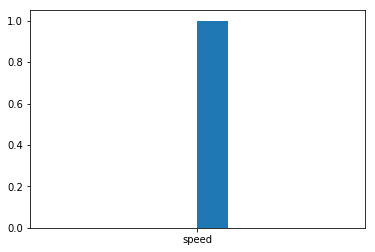

In [2]:
#creating a figure
fig = plt.figure()
#creating a new Axes object in the Figure
ax = fig.add_axes([.125, .125, .775, .755])
#plotting data
ax.hist(data = pokemon_data['speed'], x='speed')

The method requires one list as argument specifying the dimensions of the Axes: 
- the first two elements of the list the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure)
- the last two elements specifying the Axes width and height, respectively. 

We refer to the Axes in the variable ax. 

Finally, we use the Axes method .hist() just like we did before with plt.hist().

To use Axes objects with seaborn, seaborn functions usually have an "ax" parameter to specify upon which Axes a plot will be drawn.

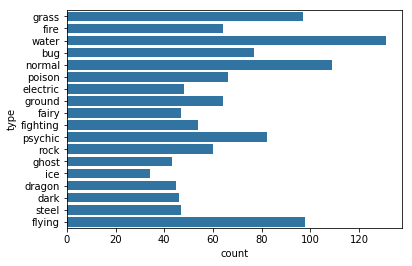

In [3]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'type', color = base_color, ax = ax );

It's possible to create subplots in one figure. 

Using plt.figure(figsize = [10, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 10 inches by 5 inches, respectively.

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0).

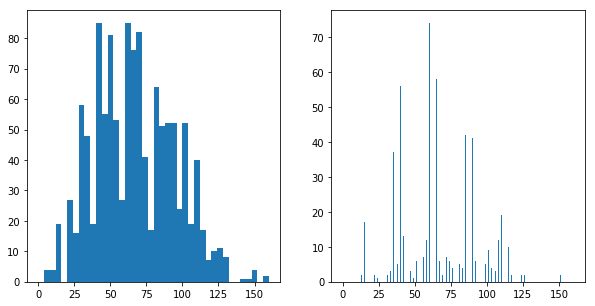

In [4]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['speed'].max()+4, 4)
plt.hist(data = df, x = 'speed', bins=bin_edges)

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['speed'].max()+1/4, 1/4)
plt.hist(data = df, x = 'speed', bins=bin_edges);

What if we removed plt.subplot(1, 2, 2) from the above code block, and just ran the rest of the lines? What would the outcome plot look like? 

- We would see two sets of bars, plotted one on top of the other.
- We would see one set of axes, occupying the left side of the figure.

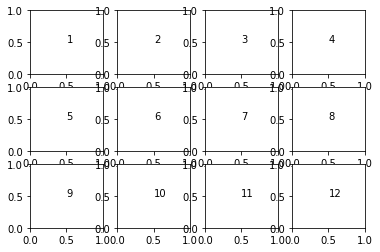

In [5]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

### Choosing a Plot for Discrete Data

If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

In [6]:
dice_rolls = np.random.randint(0,13,size=100)

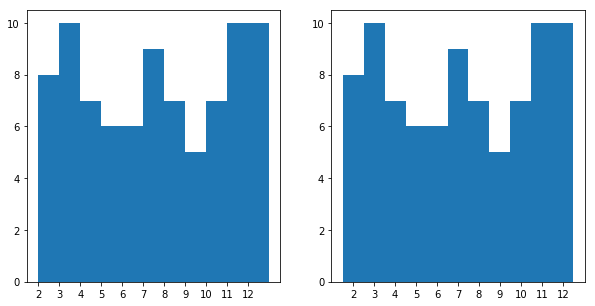

In [7]:
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(dice_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(dice_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.




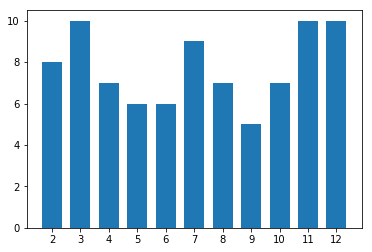

In [8]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(dice_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

# Descriptive Stats Outliers And Axis Limits V2

A descriptive statistic (in the count noun sense) is a summary statistic that quantitatively describes or summarizes features of a collection of information,[1] while descriptive statistics in the mass noun sense is the process of using and analyzing those statistics. Descriptive statistics is distinguished from inferential statistics (or inductive statistics), in that descriptive statistics aims to summarize a sample, rather than use the data to learn about the population that the sample of data is thought to represent.

Measures of central tendency include the mean, median and mode, while measures of variability include the standard deviation (or variance), the minimum and maximum values of the variables, kurtosis and skewness.

In probability theory and statistics:
- kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population;
- skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined. We can have two kind of distributions: negative skew - The left tail is longer; positive skew - The right tail is longer

For instance with our pokemon dataset we can analyze the distribution by using the hist function of pyplot

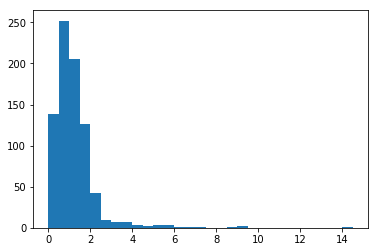

In [9]:
bins = np.arange(0, pokemon_data['height'].max()+0.5,0.5)
plt.hist(data=pokemon_data, x='height', bins=bins);

As it's possible to see from the above figure we have a distribution with some outliers which is not so significant. We can avoid to display them by using the xlim fun of pyplot. Here we can limit the x-axes in a given range (included) and set a different step for the bins.

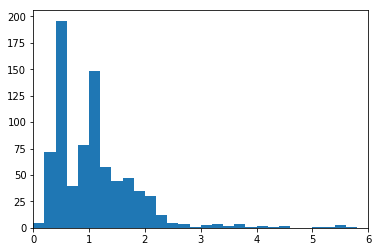

In [10]:
bins = np.arange(0, pokemon_data['height'].max()+0.2,0.2)
plt.hist(data=pokemon_data, x='height', bins=bins)
plt.xlim((0,6));

oh wait! we can plot them togheter

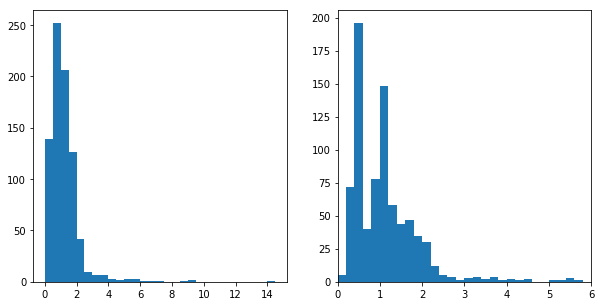

In [11]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bins = np.arange(0, pokemon_data['height'].max()+0.5,0.5)
plt.hist(data=pokemon_data, x='height', bins=bins)
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon_data['height'].max()+0.2,0.2)
plt.hist(data=pokemon_data, x='height', bins=bins)
plt.xlim((0,6));

### Scales And Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

let's see an exmpale with our data

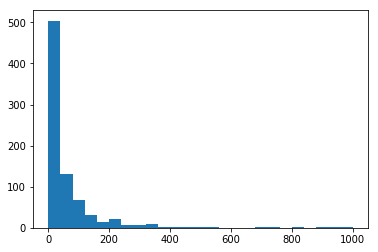

In [12]:
bins = np.arange(0, pokemon_data['weight'].max()+40,40)
plt.hist(data=pokemon_data, x='weight', bins=bins);

The distribution is pretty skewed (positive skew). let's see how we can transform it using log-normal distribution by using the xscale fun of pyplot using the value 'log' 

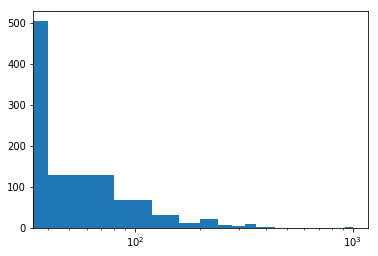

In [13]:
bins = np.arange(0, pokemon_data['weight'].max()+40,40)
plt.hist(data=pokemon_data, x='weight', bins=bins)
plt.xscale('log');

Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

Now we must work on the bin size

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use xticks to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. 

Let's analyze the stast of the column

In [14]:
pokemon_data['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [15]:
np.log10(pokemon_data['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

in a log-scale we can see that the min of the distribution is -1 and the max is around 3. because of this, we can replace the bins distribution by doing the exp of 10 for the [-1, 3.1] as follows

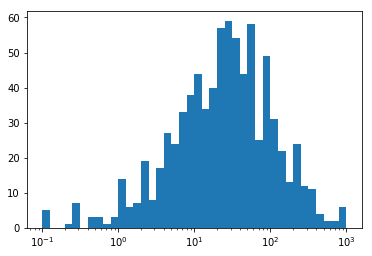

In [16]:
bins = 10 ** np.arange(-1, 3+0.1,0.1)
plt.hist(data=pokemon_data, x='weight', bins=bins)
plt.xscale('log');

To make the chart simple to read we chan change the labels.

It is important that the xticks are specified after xscale since that function has its own built-in tick settings

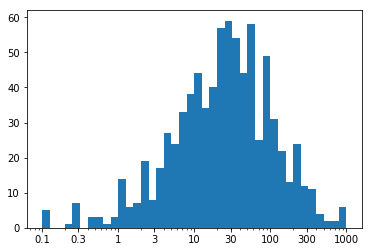

In [17]:
bins = 10 ** np.arange(-1, 3+0.1,0.1)

#changing labels
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
lables = ['{}'.format(v) for v in ticks]

plt.hist(data=pokemon_data, x='weight', bins=bins)
plt.xscale('log')
plt.xticks(ticks, lables);

Be aware that a logarithmic transformation is not the only one possible. When we perform a logarithmic transformation, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling.